In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

#Aircraft Safety 

#Crash CSV

data was sourced from [Kaggle- Airplane Crash Data since 1098](https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908/download/EgEHNXSd26n6ZCWXCe3f%2Fversions%2FO6ViyWI1uFqdrGSHlrA7%2Ffiles%2FAirplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv?datasetVersionNumber=1)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/maiali13/DS13-Unit1-Build/master/Airplane_Crash_Data.csv')
print(df.shape)

(4967, 17)


In [0]:
#convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


###General DF Insights

In [0]:
df.isnull().sum()

Date                        0
Time                     1510
Location                    4
Operator                   10
Flight #                 3652
Route                     774
AC Type                    15
Registration              273
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     41
Summary                    64
dtype: int64

In [0]:
df.describe()

,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


In [0]:
df.describe(exclude='number')

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Summary
count,4967,3457,4963,4957,1315,4193,4952,4694,4299,4903
unique,4539,1062,4101,2242,883,3800,2447,4661,3869,4808
top,2001-09-11 00:00:00,15:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,49,4,Crashed under unknown circumstances.
freq,4,37,17,255,36,92,333,3,8,9
first,1908-09-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-07-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.dtypes

Date                     datetime64[ns]
Time                             object
Location                         object
Operator                         object
Flight #                         object
Route                            object
AC Type                          object
Registration                     object
cn/ln                            object
Aboard                          float64
Aboard Passangers               float64
Aboard Crew                     float64
Fatalities                      float64
Fatalities Passangers           float64
Fatalities Crew                 float64
Ground                          float64
Summary                          object
dtype: object

In [0]:
#how many crashes over ocean/ sea
df['Location'].str.contains('sea|ocean|Ocean|Sea|Mediterranean|Channel').value_counts()[True]

105

In [0]:
#find how many crash descriptions are related to weather conditions
df['Summary'].str.contains('weather|storm|fog').value_counts()[True]

1061

In [0]:
#find how many crash descriptions were violent
df['Summary'].str.contains('shot').value_counts()[True]

108

In [0]:
#now we can look for insights into date of crashes
#which year had the most plane crashes?
df['Date'].dt.year.value_counts(normalize=False)

1946    88
1989    83
1947    82
1962    77
1972    77
        ..
1913     3
1915     2
1909     1
1912     1
1908     1
Name: Date, Length: 109, dtype: int64

In [0]:
#sorting by year instead of incidents
df['Date'].dt.year.value_counts().sort_index()

1908     1
1909     1
1912     1
1913     3
1915     2
        ..
2015    18
2016    23
2017    15
2018    16
2019     9
Name: Date, Length: 109, dtype: int64

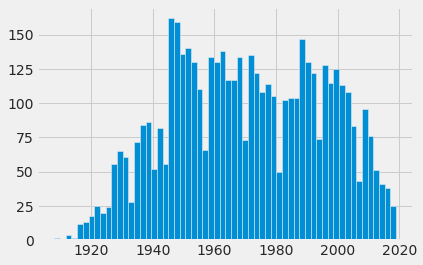

In [0]:
#vizualization of crashes by year
df['Date'].dt.year.hist(bins=60);

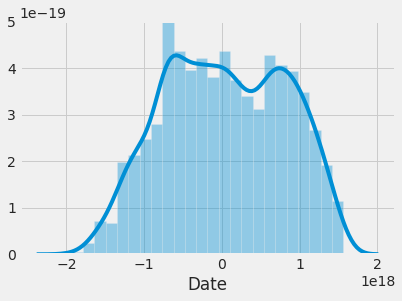

In [0]:
sns.distplot(df['Date']);
#histogram with KDE fit

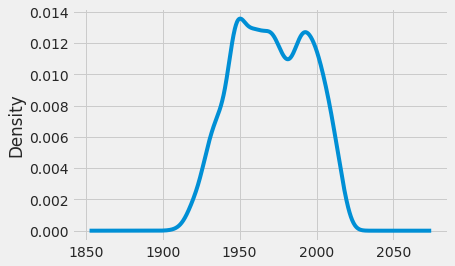

In [0]:
df['Date'].dt.year.plot.density();
#not that useful

In [0]:
df['Route'].value_counts(normalize=False)
#most common are training/testing flights

Training                           92
Sightseeing                        31
Test flight                        22
Sao Paulo - Rio de Janeiro          7
Test                                6
                                   ..
Bario - Marudi                      1
Ogden, UT - Las Vegas, NV           1
Palmerston North - Christchurch     1
La Grande - Lac Bienville           1
Turku - Mariehamn                   1
Name: Route, Length: 3800, dtype: int64

In [0]:
df['AC Type'].value_counts(normalize=False)
#most common is WWII era aircraft

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 38
                                           ... 
Short Empire flying boat                      1
Boeing - EC-135N                              1
Douglas DC-3 / USN R4-D6                      1
C-47(DC-3)                                    1
Airbus A300B2-101                             1
Name: AC Type, Length: 2447, dtype: int64

In [0]:
df['Location'].value_counts(normalize=False)

Moscow, Russia                             17
Manila, Philippines                        14
New York, New York                         14
Sao Paulo, Brazil                          13
Cairo, Egypt                               13
                                           ..
Near Valladolid, Ecuador                    1
Oahu, Hawaii                                1
Ciudad Havajillo, Dominican Republic        1
Casper, Wyoming                             1
McPherson Ranges, Queensland, Australia     1
Name: Location, Length: 4101, dtype: int64

In [0]:
df['Operator'].value_counts(normalize=False)
#should make 2 DFs, one civilian and one military

Aeroflot                           255
Military - U.S. Air Force          140
Air France                          72
Deutsche Lufthansa                  63
United Air Lines                    44
                                  ... 
Air Angles Inc.                      1
NOAR Linhas Aéreas                   1
Astro Air Taxi                       1
Military - Colombian government      1
Military - TAM (Bolivia)             1
Name: Operator, Length: 2242, dtype: int64

In [0]:
#mail flights
mail = df[df['Operator'].str.contains('Mail|FedEx|Post|Letter') == True]
print(mail.shape)
mail.head()

(38, 17)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...
24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...
29,1919-10-14,NaN,"Cantonsville, Maryland",US Aerial Mail Service,NaN,NaN,Curtiss R-4LM,32,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The pilot was performing a mail flight to Balt...
31,1919-10-30,NaN,"Long Valley, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH.4,77,77,1.0,0.0,1.0,1.0,0.0,1.0,0.0,While on a mail flight to New York the pilot e...


In [0]:
#cargo flights
cargo = df[df['Summary'].str.contains('Cargo') == True]
print(cargo.shape)
cargo.head()

(17, 17)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
940,1947-02-14,04:20,"Denver, Colorado",Slick Airways,NaN,"Omaha, NE - Denver, CO",Curtiss C-46E,NC59486,2944,2.0,0.0,2.0,2.0,0.0,2.0,0.0,Cargo flight. The momentary loss of control or...
975,1947-08-08,18:49,"New York, New York",American Airlines,NaN,New York - Buffalo,Douglas DC-3C,NX88787,19639,5.0,3.0,2.0,3.0,1.0,2.0,0.0,Cargo flight. Lost an engine on takeoff and de...
1038,1948-05-16,20:42,"Columbus, Ohio",Slick Airways,NaN,"Newark, NJ - Chicago, IL",Curtiss C-46E,NC59489,2938,2.0,0.0,2.0,2.0,0.0,2.0,0.0,Cargo flight. The in-flight failure of the fus...
1039,1948-05-20,23:30,"Near Bovingdon, England",Air Transport Charter,NaN,Valence - Bovingdon,Douglas C-47A,G-AJBG,14003/25448,4.0,0.0,4.0,3.0,0.0,3.0,0.0,Cargo flight. While maneuvering at night under...
1054,1948-08-01,09:40,"Karachi, Pakistan",Onzeair,NaN,Chaklala – Mauripur,Avro 691 Lancastrian (flying boat),AP-ACM,37031,4.0,0.0,4.0,4.0,0.0,4.0,0.0,Cargo flight. An error in judgement on the par...


In [0]:
#all mail and cargo flight accidents
totalmail = mail.append(cargo)
print(totalmail.shape)
totalmail.head()

(55, 17)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
23,1918-12-16,NaN,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,97,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Carl Smith was killed when his mail plane feet...
24,1919-05-25,NaN,"Cleveland, Ohio",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,61,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,Caught fire in midair. The pilot leaped from t...
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...
29,1919-10-14,NaN,"Cantonsville, Maryland",US Aerial Mail Service,NaN,NaN,Curtiss R-4LM,32,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The pilot was performing a mail flight to Balt...
31,1919-10-30,NaN,"Long Valley, New Jersey",US Aerial Mail Service,NaN,NaN,De Havilland DH.4,77,77,1.0,0.0,1.0,1.0,0.0,1.0,0.0,While on a mail flight to New York the pilot e...


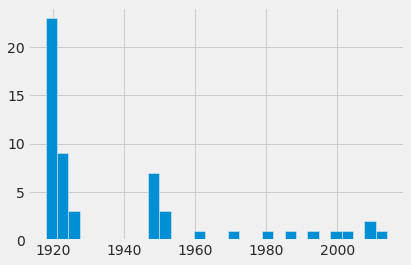

In [0]:
#vizualization of mail and cargo crashes by year
totalmail['Date'].dt.year.hist(bins=30);

In [0]:
#how many for unknown causes?
unk = df[df['Summary'].str.contains('unknown|Unknown|mystery|uncertain|Uncertain|Disappeared|disappeared') == True]
print(unk.shape)
unk.head()

(260, 17)


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
8,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
25,1919-07-19,NaN,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,NaN,De Havilland DH-4,82,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The mail plane crashed under unknown circumsta...
36,1920-04-11,NaN,"Heller Field, New Jersey",US Aerial Mail Service,NaN,NaN,Curtiss JN-4H,44,NaN,2.0,1.0,1.0,1.0,0.0,1.0,0.0,The aircraft crashed while on approach for unk...
40,1920-08-16,NaN,"Bedford, England",By Air,NaN,NaN,Armstrong-Whitworth F-K-8,G-EALW,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The plane crashed during a cargo flight under ...
52,1921-02-09,NaN,"La Crosse, Wisconsin",US Aerial Mail Service,NaN,NaN,Junkers F-13,301,NaN,3.0,0.0,3.0,3.0,0.0,3.0,0.0,Crashed for unknown reasons. Both pilots and t...


#Military DF

In [0]:
#lets make a new DF for military
military = df[['Date','Location','Operator','Route', 'AC Type', 'Aboard', 'Fatalities', 'Summary']]
mil = military[military['Operator'].str.contains("Military") == True]
print(mil.shape)
mil.head()

(750, 8)


,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,"During a demonstration flight, a U.S. Army fly..."
2,1912-07-12,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,First U.S. dirigible Akron exploded just offsh...
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),41.0,21.0,Crashed into trees while attempting to land af...


##Military Crash Insights

In [0]:
#how many Military crashes over ocean/ sea
mil['Location'].str.contains('sea|ocean|Ocean|Sea|Mediterranean|Channel').value_counts()[True]

22

In [0]:
#find how many crash descriptions are related to weather conditions
mil['Summary'].str.contains('weather|storm|fog').value_counts()[True]

115

In [0]:
#find how many militatry crash descriptions were violent
mil['Summary'].str.contains('shot').value_counts()[True]

20

In [0]:
#how many military crashes were testing flights of some kind
mil['Route'].str.contains('Training|Test').value_counts()[True]

39

In [0]:
#which Military had the most crashes?
mil['Operator'].value_counts(normalize=False)

Military - U.S. Air Force             140
Military - U.S. Army Air Forces        43
Military - Royal Air Force             32
Military - U.S. Navy                   29
Military - U.S. Army                   27
                                     ... 
Military - Russian Army                 1
Military - Kenya Air Force              1
Military - Colombian Army               1
Military - Force Aérienne Zaïroise      1
Military - TAM (Bolivia)                1
Name: Operator, Length: 224, dtype: int64

In [0]:
#How many are US military of some branch?
mil['Operator'].str.contains('U.S.').value_counts()[True]
#US military (all branches combined) are more than one third of all military crashes (280/750 = 37.333)

280

In [0]:
#make non-US military DF
other_mil = mil[mil['Operator'].str.contains("U.S.") == False]
print(other_mil.shape)
other_mil.head()

(470, 8)


,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
4,1913-09-09,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,The airship flew into a thunderstorm and encou...
5,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,Hydrogen gas which was being vented was sucked...
6,1915-03-05,"Tienen, Belgium",Military - German Navy,NaN,Zeppelin L-8 (airship),41.0,21.0,Crashed into trees while attempting to land af...
7,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,NaN,Zeppelin L-10 (airship),19.0,19.0,"Exploded and burned near Neuwerk Island, when..."
8,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,NaN,Schutte-Lanz S-L-10 (airship),20.0,20.0,"Crashed near the Black Sea, cause unknown."


In [0]:
#which non-US Military had the most crashes?
other_mil['Operator'].value_counts(normalize=False)
#UK at 54

Military - Royal Air Force                                32
Military -Royal Air Force                                 22
Military - German Navy                                    15
Military - Indian Air Force                               15
Military - Afghan Republican Air Force                    15
                                                          ..
Military - Lybian Arab Air Force                           1
British European Airways / Military - Soviet Air Force     1
Military - British Air Ministry                            1
Military - Angolan  Air Force                              1
Military - TAM (Bolivia)                                   1
Name: Operator, Length: 196, dtype: int64

In [0]:
mil['Fatalities'].mean

<bound method Series.mean of 0         1.0
2         5.0
4        14.0
5        30.0
6        21.0
        ...  
4946     39.0
4949    257.0
4951      9.0
4965     13.0
4966      5.0
Name: Fatalities, Length: 750, dtype: float64>

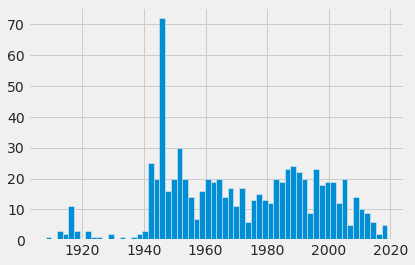

In [0]:
#vizualization of crashes by year
mil['Date'].dt.year.hist(bins=60);

#Civilian DF

In [0]:
#new DF for civilian
civilian = df[['Date','Location','Operator','Route', 'AC Type', 'Aboard', 'Fatalities', 'Summary']]
civ = civilian[civilian['Operator'].str.contains("Military") == False]
print(civ.shape)
civ.head()

(4207, 8)


,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,The first fatal airplane accident in Canada oc...
23,1918-12-16,"Elizabeth, New Jersey",US Aerial Mail Service,NaN,De Havilland DH-4,1.0,1.0,Carl Smith was killed when his mail plane feet...
24,1919-05-25,"Cleveland, Ohio",US Aerial Mail Service,NaN,De Havilland DH-4,1.0,1.0,Caught fire in midair. The pilot leaped from t...
25,1919-07-19,"Dix Run, Pennsylvania",US Aerial Mail Service,NaN,De Havilland DH-4,1.0,1.0,The mail plane crashed under unknown circumsta...
26,1919-07-21,"Chicago, Illinois",Wingfoot Air Express Goodyear Tire,Shuttle,FD Type Dirigible,NaN,3.0,"The dirigible, cruising at 1,200 ft. caught f..."


##Civlian Crash Insights

In [0]:
#how many civilian crashes over ocean/ sea
civ['Location'].str.contains('sea|ocean|Ocean|Sea|Mediterranean|Channel').value_counts()[True]

83

In [0]:
#find how many civilian crash descriptions are related to weather conditions
civ['Summary'].str.contains('weather|storm|fog').value_counts()[True]

946

In [0]:
#find how many civilian crash descriptions were violent
civ['Summary'].str.contains('shot').value_counts()[True]
#unfortunately 80% of all violent crashes (88/108) involved civilian aircraft 

88

In [0]:
#new df to get more insight into downed civilian planes
shot_down = civ[civ['Summary'].str.contains('shot') == True]
shot_down

,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
523,1938-08-24,"Wangmoon, China",China National Aviation Corporation,Hong Kong - Chungking,Douglas DC-2,17.0,14.0,"While en route from Hong Kong to Chungking, th..."
579,1940-06-14,"Off Prangli Island, Gulf of Finland, Estonia",Aero O-Y,"Tallinn, Estonia - Helsinki, Finland",Junkers JU-52/3mge,9.0,9.0,The plane was en route when it was shot down b...
580,1940-06-20,"Near Ouistreham, France",Air France,NaN,Dewoitine D-338,1.0,1.0,Inadvertently shot down by French anti-aircraf...
596,1940-12-24,"Capri Island, Italy",Ala Littolia,Catania - Rome,Savoia-Marchetti SM.75,7.0,7.0,"While en route, the aircraft was shot down by ..."
686,1943-08-11,"Fort Hertz, China",China National Aviation Corporation,NaN,Douglas C-53,3.0,3.0,The cargo plane was shot down by Japanese figh...
...,...,...,...,...,...,...,...,...
4618,2007-06-28,"M'Banza Congo, Angola",TAAG Angola Airlines,Luanda - M'Banza,Boeing 737-2M2,78.0,5.0,The crew undershot the runway and blew two tir...
4631,2007-09-07,"Goma, Democratic Republic Congo",Galaxy Kavatsi Airlines,Kisangi - Goma - Bukavu,Antonov AN-12BP,8.0,8.0,"The cargo plane, carrying palm oil, overshot t..."
4692,2009-01-15,"Adraskan district, Afghanistan",Afghan Army,NaN,Mil Mi-17,13.0,13.0,Either shot down or crashed due to bad weather.
4760,2010-08-24,"Yichun, China",Henan Airlines,Harbin - Yichun,Embraer ERJ-190-100LR,96.0,44.0,The plane overshot the runway while landing an...


In [0]:
shot_down['Fatalities'].mean
#average of 14 deaths 

<bound method Series.mean of 523     14.0
579      9.0
580      1.0
596      7.0
686      3.0
        ... 
4618     5.0
4631     8.0
4692    13.0
4760    44.0
4886    37.0
Name: Fatalities, Length: 88, dtype: float64>

In [0]:
civ['Fatalities'].mean

<bound method Series.mean of 3         1.0
23        1.0
24        1.0
25        1.0
26        3.0
        ...  
4960     14.0
4961    157.0
4962      6.0
4963     13.0
4964     41.0
Name: Fatalities, Length: 4207, dtype: float64>

In [0]:
#not linear/specific trend
shot_down['Date'].dt.year.value_counts(normalize=False)

2007    4
1980    4
1991    4
1948    3
1940    3
1969    3
1999    3
1952    3
1961    3
1946    3
1977    2
1964    2
1959    2
1973    2
1965    2
1966    2
1957    2
1989    2
1988    2
1990    2
1947    2
1996    2
1997    2
1998    2
2000    2
1951    1
1953    1
1954    1
1955    1
1943    1
1968    1
2015    1
1970    1
1971    1
2009    1
2001    1
1995    1
1994    1
1993    1
1987    1
1986    1
1984    1
1983    1
1982    1
1981    1
1979    1
2010    1
1974    1
1972    1
1938    1
Name: Date, dtype: int64

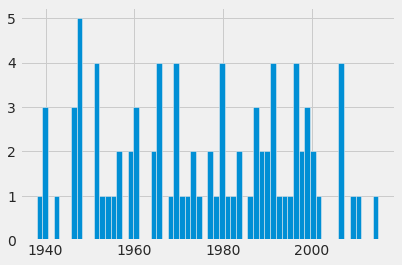

In [0]:
#vizualization of planes show down by year
shot_down['Date'].dt.year.hist(bins=60);

In [0]:
#most dangerous airline
civ['Operator'].value_counts(normalize=False)

Aeroflot                               255
Air France                              72
Deutsche Lufthansa                      63
United Air Lines                        44
China National Aviation Corporation     43
                                      ... 
Chamberlin Flying Service                1
Petrolium Helicopter                     1
Pinnacle Airlines/Northwest Airlink      1
Viking Air Transport                     1
Carib Air Transport                      1
Name: Operator, Length: 2018, dtype: int64

In [0]:
#deadliest years
civ['Date'].dt.year.value_counts(normalize=False)

1948    74
1989    70
1947    69
1972    68
1962    66
        ..
1919     9
1924     7
2019     7
1913     1
1918     1
Name: Date, Length: 103, dtype: int64

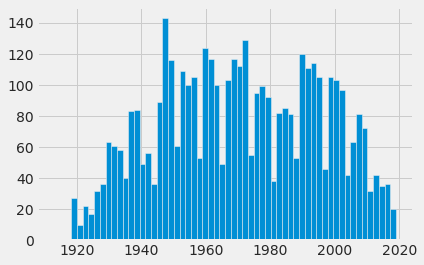

In [0]:
#vizualization of crashes by year
civ['Date'].dt.year.hist(bins=60);

In [0]:
#lets make df of Aeroflot crashes
mostd = civ[civ['Operator'].str.contains('Aeroflot') == True]
mostd

,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
360,1934-12-31,NaN,Aeroflot,NaN,Tupolev ANT-9,10.0,10.0,Crashed under unknown circumstances.
424,1936-07-28,"Kulyab, Tajikistan",Aeroflot,NaN,Tupolev ANT-9,6.0,6.0,The landing gear failed on landing. The aircra...
468,1937-08-06,"Bistrita, Romania",Aeroflot,NaN,Douglas DC-2,5.0,5.0,"While en route, the plane caught fire and cras..."
620,1941-11-29,"Chardzhou, Turkmenistan",Aeroflot,Chardzhou - Urgench,Tupolev ANT-6,36.0,7.0,"During the initial climb at night, the pilot i..."
622,1941-12-26,"Baiserke, Kazakhstan",Aeroflot,Almaty - Karaganda - Aktyubinsk - Kuybyshev - ...,Tupolev ANT-6,34.0,26.0,The crew decided to takeoff in below-minima we...
...,...,...,...,...,...,...,...,...
3933,1995-03-16,"Ossora, Russia",Aeroflot,Petropavlovsk - Ossora,Antonov 26B,10.0,9.0,The cargo plane flew into high ground while on...
3945,1995-06-16,"Herputchi, Russia",Aeroflot,Poliny - Nikolayevsk-on-Amur,Antonov AN-2,14.0,13.0,Flying VOR the plane ran into poor weather and...
4032,1996-10-08,"San Francesco al Campo, Italy",Aeroflot,"Moscow - Turin, Italy",Antonov An-124,23.0,2.0,The cargo plane struck trees and a house while...
4679,2008-09-14,"Perm, Russia",Aeroflot,Moscow - Perm,Boeing B-737-505,88.0,88.0,The aircraft crashed into a ravine adjacent to...


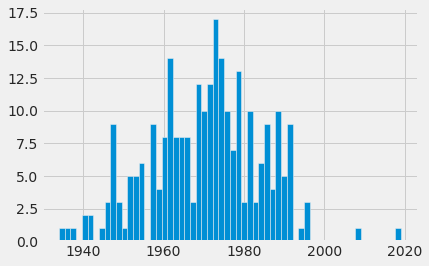

In [0]:
#visualization of Aeroflot crashes by year
mostd['Date'].dt.year.hist(bins=60);
#so most Aeroflot crashes happened when the USSR was under embargo/sanctions

In [0]:
#are they are using their own airplanes?
mostd['AC Type'].value_counts(normalize=False)
#confirmed

Yakovlev YAK-40       18
Ilyushin IL-12        13
Antonov AN-24         12
Ilyushin IL-14P       11
Ilyushin IL-18B       10
                      ..
LET  410M Turbojet     1
Mil Mi-8T              1
Doublas C-47           1
Ilyushin Il12          1
Antonov 10A            1
Name: AC Type, Length: 111, dtype: int64

In [0]:
#general avation: recreational vs airline
rec = civ[civ['Operator'].str.contains('Private|NaN|Charter') == True]
rec

,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
3,1913-08-06,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,The first fatal airplane accident in Canada oc...
131,1927-09-17,Atlantic Ocean,Private,Old Orchad Beach - Rome,Fokker F7,3.0,3.0,"While flying 1,000 km east of the Canadian coa..."
385,1935-08-15,"Walakpa, near Point Barrow, Alaska",Private,NaN,Lockheed Orion 9E Explorer float plane,2.0,2.0,Dense fog caused the pilot to make a forced la...
464,1937-07-02,"Off Lae, New Guinea",Private - Purdue Reasearch Foundation,Lae - Howland Island,Lockheed 10E Electra,2.0,2.0,The plane disappeared while en route from Lae...
668,1943-02-18,"Seattle, Washington",Private - Boeing Aircraft Company,Test flight,Boeing XB-29,10.0,10.0,"Lost altitude, struck power lines and crashed ..."
...,...,...,...,...,...,...,...,...
4802,2011-09-16,"Reno, Nevada",Private - Aero Trans Corp,Air race,North American P-51D-15-NA Mustang,1.0,1.0,The pilot of the aircraft participating in an ...
4803,2011-09-22,"Yellowknife, Northwest Territories, Canada",Arctic Sunwest Charters,Thor Lake - Great Slave Lake,De Havilland Canada DHC-6-300 Twin Otter,9.0,2.0,While coming in for a landing at Great Slave L...
4888,2015-03-10,"Villa Castelli, Argenina",Private,NaN,NaN,10.0,10.0,Three French sports figures participating in a...
4930,2017-03-27,"Mautaer, Zimbabwe",ETA Air Charter,"Beira, Mozambique - Harare, Zimbabwe",Britten-Norman BN2 Islander,6.0,6.0,While en route the air transport plane collide...


In [0]:
#another recreational df
tours = civ[civ['Summary'].str.contains('Sightseeing|Tour|sightseeing|tour|taxi') == True]
tours.head()

,Date,Location,Operator,Route,AC Type,Aboard,Fatalities,Summary
130,1927-09-17,"Hadley, New Jersey",Reynolds Airways,Sightseeing,Fokker F-VII,12.0,7.0,The sightseeing plane took off and rose to 400...
159,1928-09-04,"Adelaide Hills, Australia",Qantas,Adelaide - Longreach,de Havilland DH.50J,2.0,1.0,Following the conclusion of an aerial tour car...
181,1929-03-17,"Newark, New Jersey",Colonial Western Airlines,Sightseeing,Ford 5-AT-B Tri Motor,15.0,14.0,The plane was making the last of a number of s...
206,1929-10-31,"Off Bremerton, Washington",Bremerton-Seattle Air Taxi / Gorst Air Lines,Bremerton - Seattle,Loening C-2C,2.0,2.0,The air taxi crashed into Puget Sound as it at...
372,1935-05-18,"Flint, Michigan",Knowles Flying Service of Detroit,Sightseeing,Ford model 4-AT-E,12.0,3.0,"While on a sightseeing trip, the plane ran out..."


In [0]:
totalrec = rec.append(tours)
totalrec.shape

(196, 8)

#Total Flights CSV

data sourced from the [World Bank](https://data.worldbank.org/indicator/IS.AIR.DPRT?most_recent_year_desc=false), total number of flights annually

In [0]:
#create a new dataframe with information on total numbers of flights for more insight
flights = pd.read_csv('https://raw.githubusercontent.com/maiali13/DS13-Unit1-Build/master/Total_Flights.csv')
print(flights.shape)

(264, 64)


In [0]:
flights = flights.T
flights.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263
2015,NaN,23532,13116,NaN,NaN,1.37586e+06,437638,145585,NaN,NaN,40047,668961,152056,23781,NaN,141116,1209,3875,55864,11768,57444,48535,81,22939,120072,NaN,42682,944557,NaN,11624,4640,7741,NaN,1.32203e+06,420199,250094,NaN,116532,3.61603e+06,9068,...,17124,168,NaN,NaN,5.87269e+06,1.8988e+06,9947,392664,6884,8548,2.83263e+06,NaN,510478,NaN,1.02625e+06,720955,35127,35540,706067,NaN,35374,2332,45688,9.25052e+06,NaN,9.49867e+06,22579,NaN,73509,NaN,NaN,205217,10425,3.33628e+07,11759,NaN,5126,209734,11130,4145
2016,NaN,22770,15482,306,NaN,1.47681e+06,463947,149334,NaN,NaN,40928,682937,149030,24009,NaN,147324,10,3861,59728,12187,55592,49095,NaN,26857,121581,NaN,45722,826943,NaN,11058,6065,7933,NaN,1.35944e+06,436849,229530,NaN,116238,3.9521e+06,9463,...,19178,170,NaN,NaN,6.43156e+06,1.9545e+06,10725,413880,6472,12890,2.75727e+06,NaN,556552,NaN,1.17397e+06,720715,29892,38631,743673,NaN,27422,3828,55261,9.5872e+06,NaN,9.64059e+06,21486,NaN,64058,NaN,NaN,248580,9037,3.4688e+07,13805,NaN,4538,212865,8094,4231
2017,2132,24207,13494,1904,NaN,1.50355e+06,459137,146631,NaN,NaN,24019,672349,156761,20699,NaN,145540,NaN,3863,70503,11748,54474,48017,NaN,29562,141319,NaN,54102,803846,NaN,10743,4215,7002,NaN,1.44382e+06,484988,216436,NaN,124316,4.35903e+06,14884,...,20539,165,NaN,NaN,6.91985e+06,2.07862e+06,10485,448477,4135,16843,2.68534e+06,NaN,624693,NaN,1.31317e+06,781350,32589,39856,742260,NaN,47741,1953,63315,1.01787e+07,NaN,9.6391e+06,21730,NaN,43138,NaN,NaN,264548,12287,3.57038e+07,6098,NaN,1669,216275,9020,3444
2018,2276,24433.4,13978,2935,NaN,1.49335e+06,455957,161688,NaN,NaN,23207,665384,130260,19960,NaN,140674,NaN,4270,101383,11435,57094,56629.5,NaN,31676,125682,NaN,56592,832683,NaN,11310,5187,6774,NaN,1.47506e+06,528364,219782,NaN,134661,4.69201e+06,15188,...,18671,167.754,NaN,NaN,7.38361e+06,2.19656e+06,11559,475886,4021,18184,2.751e+06,NaN,625200,NaN,1.51278e+06,787903,32770,41446,772926,NaN,51577,4832,66712,1.06469e+07,NaN,9.87963e+06,21514,NaN,24986,NaN,NaN,283787,11723,3.69996e+07,6848,NaN,2342,180317,734,3444
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#sum each column for yearly flight totals
sums = flights.sum(axis=1)
year_sums = pd.DataFrame(sums[4:], columns=['Total Flights'])
year_sums = year_sums.reset_index()
year_sums.rename(columns={'index': 'Year'}, inplace=True)
year_sums.tail()

,Year,Total Flights
55,2015,2.77036e+08
56,2016,2.89138e+08
57,2017,2.99027e+08
58,2018,3.1122e+08
59,2019,0


In [0]:
year_sums = year_sums.astype('int')
year_sums.dtypes

Year             int64
Total Flights    int64
dtype: object

In [0]:
year_sums.tail()

,Year,Total Flights
55,2015,277035974
56,2016,289138268
57,2017,299027145
58,2018,311220051
59,2019,0


In [0]:
#make crash total by year dataset to add this to
crashes_total = df['Date'].dt.year.value_counts().sort_index()
print(crashes_total.shape)
crashes_total.tail()

(109,)


2015    18
2016    23
2017    15
2018    16
2019     9
Name: Date, dtype: int64

In [0]:
crashes_total = pd.DataFrame(crashes_total)
crashes_total= crashes_total.reset_index()
crashes_total.tail()

,index,Date
104,2015,18
105,2016,23
106,2017,15
107,2018,16
108,2019,9


In [0]:
crashes_total.rename(columns={'index': 'Year', 'Date':'Total Crashes'}, inplace=True)
crashes_total.tail()

,Year,Total Crashes
104,2015,18
105,2016,23
106,2017,15
107,2018,16
108,2019,9


In [0]:
graph = crashes_total.merge(year_sums, on='Year')
graph.tail()

,Year,Total Crashes,Total Flights
55,2015,18,277035974
56,2016,23,289138268
57,2017,15,299027145
58,2018,16,311220051
59,2019,9,0


In [0]:
graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 3 columns):
Year             60 non-null int64
Total Crashes    60 non-null int64
Total Flights    60 non-null int64
dtypes: int64(3)
memory usage: 1.9 KB


In [0]:
graph.head()

,Year,Total Crashes,Total Flights
0,1960,70,0
1,1961,60,0
2,1962,77,0
3,1963,61,0
4,1964,55,0


In [0]:
#crashes mil to df
mil_total = mil['Date'].dt.year.value_counts().sort_index()
print(mil_total.shape)
mil_total.tail()

(97,)


2015    3
2016    1
2017    1
2018    3
2019    2
Name: Date, dtype: int64

In [0]:
mil_total = pd.DataFrame(mil_total)
mil_total= mil_total.reset_index()

In [0]:
mil_total.rename(columns={'index': 'Year', 'Date':'Military Crashes'}, inplace=True)
mil_total.tail()

,Year,Military Crashes
92,2015,3
93,2016,1
94,2017,1
95,2018,3
96,2019,2


In [0]:
graph1 = graph.merge(mil_total, on='Year')
graph1.head()

,Year,Total Crashes,Total Flights,Military Crashes
0,1960,70,0,11
1,1961,60,0,9
2,1962,77,0,11
3,1963,61,0,8
4,1964,55,0,7


In [0]:
#crashes civ to df
civ_total = civ['Date'].dt.year.value_counts().sort_index()
print(civ_total.shape)
civ_total.tail()

(103,)


2015    15
2016    22
2017    14
2018    13
2019     7
Name: Date, dtype: int64

In [0]:
civ_total = pd.DataFrame(civ_total)
civ_total= civ_total.reset_index()

In [0]:
civ_total.rename(columns={'index': 'Year', 'Date':'Civilian Crashes'}, inplace=True)
civ_total.tail()

,Year,Civilian Crashes
98,2015,15
99,2016,22
100,2017,14
101,2018,13
102,2019,7


In [0]:
graph2 = graph1.merge(civ_total, on='Year')
graph2.head()

,Year,Total Crashes,Total Flights,Military Crashes,Civilian Crashes
0,1960,70,0,11,59
1,1961,60,0,9,51
2,1962,77,0,11,66
3,1963,61,0,8,52
4,1964,55,0,7,48


#Graphs

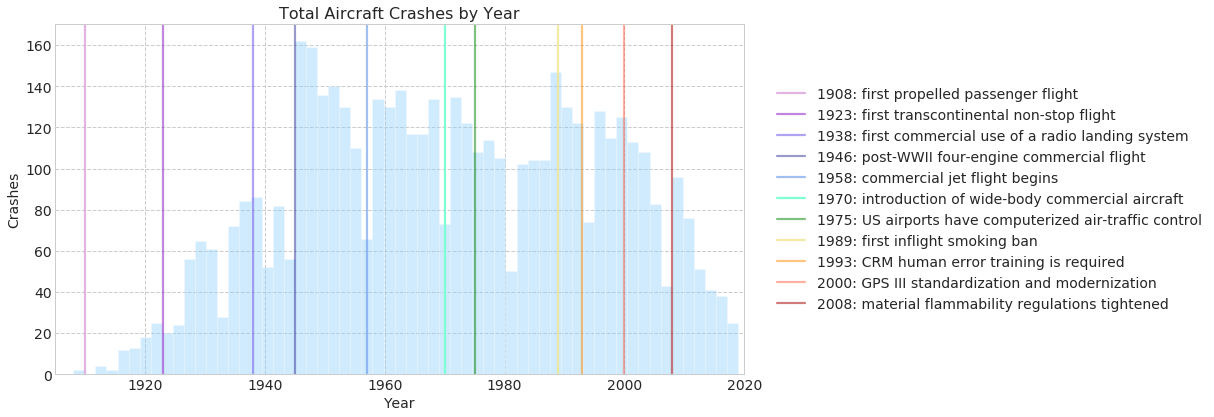

<Figure size 1152x1440 with 0 Axes>

In [0]:
#histogram of historic crashes with datelines for aviation innovations and events
plt.style.use('seaborn-whitegrid')

#data
sns.set_style("whitegrid",{'grid.linestyle': '--'})
rnbw = sns.distplot(df['Date'].dt.year, kde=False, color='lightskyblue', bins=60)
rnbw.figure.set_size_inches(11,6)

#event lines
plt.axvline(1910, ls = '-', lw=2.2, color = 'plum', alpha=.8, label='1908: first propelled passenger flight')
plt.axvline(1923, ls = '-', lw=2.2, color = 'darkorchid', alpha=.6, label='1923: first transcontinental non-stop flight')
plt.axvline(1938, ls = '-', lw=2.2, color = 'mediumslateblue', alpha=.6, label='1938: first commercial use of a radio landing system')
plt.axvline(1945, ls = '-', lw=2.2, color = 'navy', alpha=.4, label='1946: post-WWII four-engine commercial flight')
plt.axvline(1957, ls = '-', lw=2.2, color = 'cornflowerblue', alpha=.6, label='1958: commercial jet flight begins')
plt.axvline(1970, ls = '-', lw=2.2, color = 'aquamarine', alpha=1, label='1970: introduction of wide-body commercial aircraft')
plt.axvline(1975, ls = '-', lw=2.2, color = 'green', alpha=.5, label='1975: US airports have computerized air-traffic control')
plt.axvline(1989, ls = '-', lw=2.2, color = 'khaki', alpha=.8, label='1989: first inflight smoking ban')
plt.axvline(1993, ls = '-', lw=2.2, color = 'darkorange', alpha=.5, label='1993: CRM human error training is required')
plt.axvline(2000, ls = '-', lw=2.2, color = 'tomato', alpha=.5, label='2000: GPS III standardization and modernization')
plt.axvline(2008, ls = '-', lw=2.2, color = 'firebrick', alpha=.6, label='2008: material flammability regulations tightened')

#legend
plt.legend(bbox_to_anchor=(1.04,0.5), loc='center left', borderaxespad=0)

#title, labels
plt.title('Total Aircraft Crashes by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crashes', fontsize=14)
plt.xlim(1905,2020)
plt.figure(figsize=(16, 20))

plt.show()

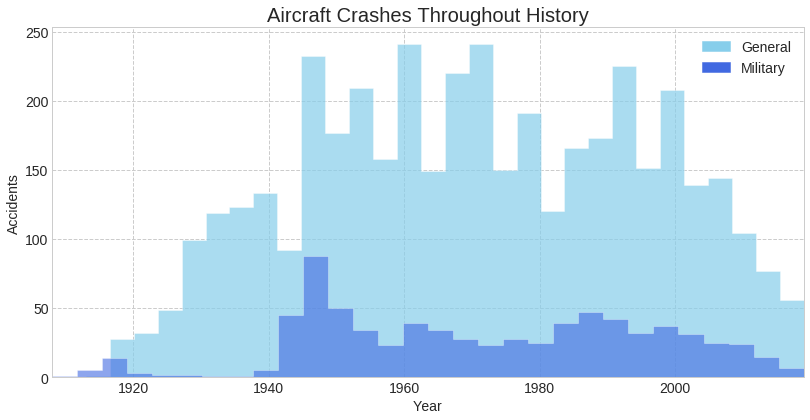

In [0]:
#overlapping/stacked histogram of civilian vs military crash counts
import matplotlib.patches as mpatches
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Aircraft Crashes Throughout History')
ax.hist(civ['Date'].dt.year, histtype='stepfilled', bins=30, alpha=0.7, color= 'skyblue')
ax.hist(mil['Date'].dt.year, histtype='stepfilled',  bins=30, alpha=0.6, color = 'royalblue')

ax.set_xbound(lower=1908, upper=2019)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Accidents",fontsize=14)
plt.grid(ls = '--')

#legend
mil_patch = mpatches.Patch(color='royalblue', label='Military')
civ_patch = mpatches.Patch(color='skyblue', label='General')
plt.legend(handles=[civ_patch, mil_patch])

plt.show()

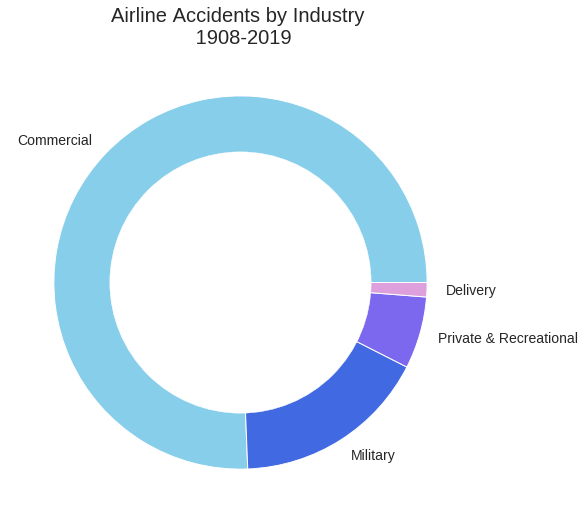

In [0]:
#donut chart of  % of crashes by industry
#data
cat = 'Commercial', 'Military', 'Private & Recreational', 'Delivery'
amounts = 3356, 750, 277, 55
#middle circle
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(amounts, labels=cat, colors=['skyblue','royalblue', 'mediumslateblue', 'plum'], wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
p=plt.gcf()
plt.title
p.set_size_inches(8,8)
p.gca().add_artist(my_circle)
plt.title('Airline Accidents by Industry \n 1908-2019')
plt.show()

In [0]:
#causes of crash stacked bar for % illustration
lst = [514,851,94,1488,1325,244]
causes = pd.DataFrame(lst, index=['Unknown','Fire','Violence','Weather & Visibility', 'Mechanical Failure', 'Pilot Error'], columns=['Totals'])
causes

,Totals
Unknown,514
Fire,851
Violence,94
Weather & Visibility,1488
Mechanical Failure,1325
Pilot Error,244


<Figure size 792x216 with 0 Axes>

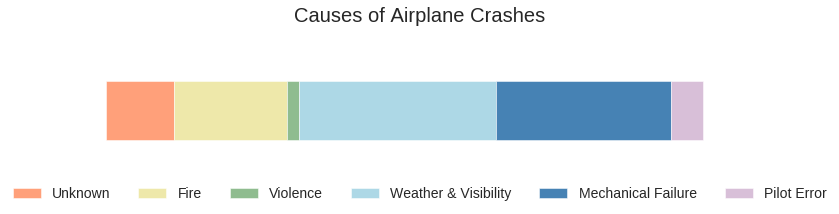

<Figure size 792x216 with 0 Axes>

In [0]:
causes.T.plot(kind='barh', stacked=True, figsize=(10,2), color=('lightsalmon','palegoldenrod','darkseagreen','lightblue','steelblue','thistle'))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=7)
plt.grid(b=None)
plt.axis('off')
plt.title('Causes of Airplane Crashes', pad=30)
plt.figure(figsize=(11,3))

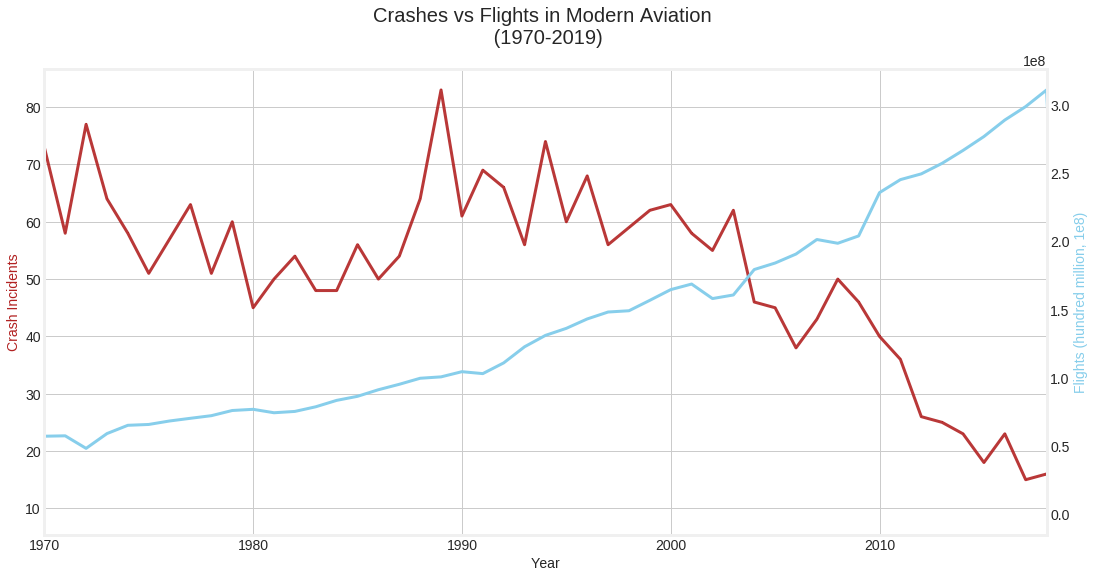

In [0]:
#plot number of crashes vs number of flights per year 
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots(figsize=(16, 8))

#crashes line
ax.plot(graph['Year'], graph['Total Crashes'], color='firebrick', alpha=.9, marker=",", lw= 3)
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Crash Incidents", color='firebrick', fontsize=14)
ax.set_xbound(lower=1970, upper=2018)

#total flights line
ax2=ax.twinx()
ax2.plot(graph['Year'], graph['Total Flights'],color="skyblue",marker=",", lw= 3)
ax2.set_ylabel("Flights (hundred million, 1e8)",color="skyblue",fontsize=14)
ax2.set_xbound(lower=1970, upper=2018)
plt.grid(b=None) #or ax.grid(False)

ax.set_facecolor('#FFFFFF')
fig.patch.set_facecolor('#FFFFFF')
ax.set_title('Crashes vs Flights in Modern Aviation \n (1970-2019)', pad=25)
plt.show()
#crashes vs flights 

In [0]:
#plot % of total flights that crashed
graph1['perc'] = (graph1['Total Crashes'] / graph1['Total Flights'])
graph1.tail()

,Year,Total Crashes,Total Flights,Military Crashes,perc
55,2015,18,277035974,3,6.497351e-08
56,2016,23,289138268,1,7.954672e-08
57,2017,15,299027145,1,5.016267e-08
58,2018,16,311220051,3,5.141057e-08
59,2019,9,0,2,inf


In [0]:
percent_crashes = graph1.drop(['Total Crashes', 'Total Flights', 'Military Crashes'],axis=1)
percent_crashes.tail()

,Year,perc
55,2015,6.497351e-08
56,2016,7.954672e-08
57,2017,5.016267e-08
58,2018,5.141057e-08
59,2019,inf


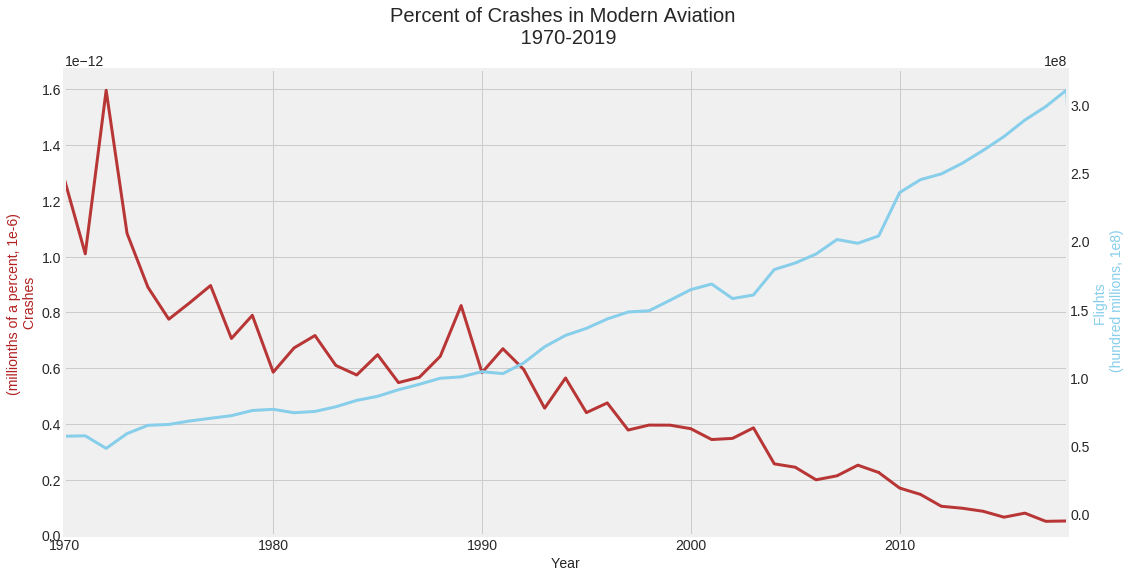

In [0]:
plt.style.use('fivethirtyeight')
#data
x = percent_crashes['Year']
#yl = [0, .025e-5, .050e-5, .075e-5, .100e-5, .100e-5, .125e-5, .150e-5]
y = percent_crashes['perc']
y = y *1e-06

fig, ax1 = plt.subplots(figsize=(16, 8))
ax2=ax1.twinx() #make 2 y lines

#flights line
ax2.plot(percent_crashes['Year'],graph['Total Flights'],color="skyblue", marker=",", lw= 3)
ax2.set_ylabel("Flights \n (hundred millions, 1e8)",color="skyblue", alpha=1, fontsize=14)
ax2.set_xbound(lower=1970, upper=2018)
ax1.set_xlabel("Year",fontsize=14)

#crashes line
ax1.plot(percent_crashes['Year'], y, color='firebrick', alpha=.9, marker=",", lw= 3)
ax1.set_ylabel("(millionths of a percent, 1e-6) \n Crashes ",color="firebrick",fontsize=14)
ax1.set_xbound(lower=1970, upper=2018)
ax1.set_ybound(lower=0)

plt.grid(b=None) #or ax.grid(False)
fig.patch.set_facecolor('#FFFFFF')
ax.set_facecolor('#FFFFFF')


#title, labels
ax1.set_title('Percent of Crashes in Modern Aviation \n 1970-2019', pad = 25)


plt.show()

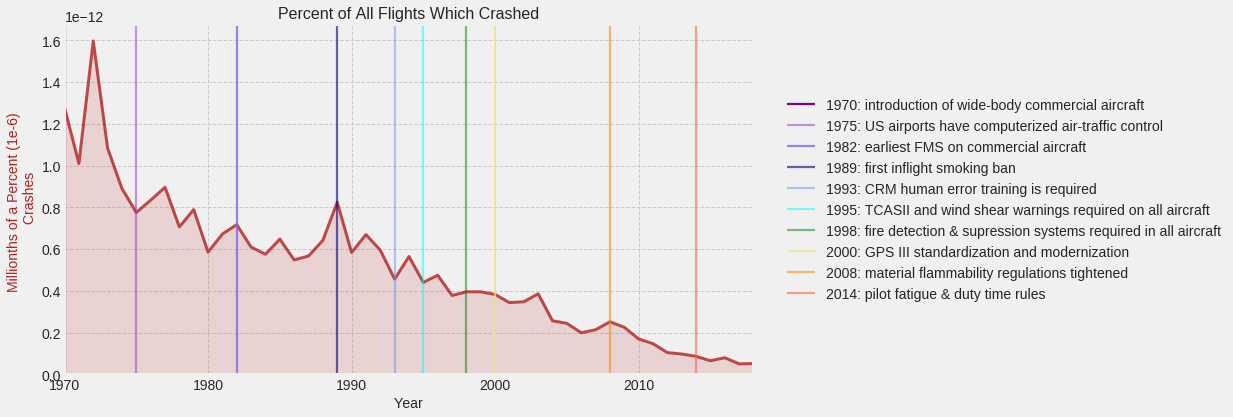

In [0]:
#graph of percent of flights which crash with eventlines 
#data
x = percent_crashes['Year']
y = percent_crashes['perc']
y = y *1e-06
plt.figure(figsize=(11,6))

#color, fill, line
plt.fill_between( x, y, color="indianred", alpha=0.1)
plt.fill_between( x, y, color="indianred", alpha=0.1)
plt.plot(x, y, color="firebrick", alpha=0.8, lw=3)
plt.grid(ls = '--')

#y lines and legend
plt.axvline(1970, ls = '-', lw=2.2, color = 'purple', alpha=1, label='1970: introduction of wide-body commercial aircraft')
plt.axvline(1975, ls = '-', lw=2.2, color = 'darkorchid', alpha=.5, label='1975: US airports have computerized air-traffic control')
plt.axvline(1982, ls = '-', lw=2.2, color = 'mediumslateblue', alpha=.8, label='1982: earliest FMS on commercial aircraft')
plt.axvline(1989, ls = '-', lw=2.2, color = 'navy', alpha=.6, label='1989: first inflight smoking ban')
plt.axvline(1993, ls = '-', lw=2.2, color = 'cornflowerblue', alpha=.5, label='1993: CRM human error training is required')
plt.axvline(1995, ls = '-', lw=2.2, color = 'cyan', alpha=.5, label='1995: TCASII and wind shear warnings required on all aircraft')
plt.axvline(1998, ls = '-', lw=2.2, color = 'green', alpha=.5, label='1998: fire detection & supression systems required in all aircraft')
plt.axvline(2000, ls = '-', lw=2.2, color = 'khaki', alpha=.7, label='2000: GPS III standardization and modernization')
plt.axvline(2008, ls = '-', lw=2.2, color = 'darkorange', alpha=.6, label='2008: material flammability regulations tightened')
plt.axvline(2014, ls = '-', lw=2.2, color = 'tomato', alpha=.6, label='2014: pilot fatigue & duty time rules')
plt.legend(bbox_to_anchor=(1.04,0.5), loc='center left', borderaxespad=0)

#title, labels
plt.title('Percent of All Flights Which Crashed', fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Millionths of a Percent (1e-6) \n Crashes",fontsize=14, color='firebrick')
plt.xlim(1969.99,2018)
plt.ylim(0)
 
plt.show()